In [140]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [141]:
df = pd.read_csv('iris.csv')

In [142]:
df.head()

,Dataset_order,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.3,setosa


In [143]:
df = df.iloc[:,1:]

In [144]:
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.3,setosa


In [145]:
from sklearn.preprocessing import LabelEncoder

In [146]:
encoder = LabelEncoder()

In [147]:
df['Species'] = encoder.fit_transform(df['Species'])

In [148]:
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.3,0


In [149]:
df = df[df['Species'] != 0][['Sepal_width','Petal_length','Species']]

In [150]:
df.head()

,Sepal_width,Petal_length,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [151]:
df.shape

(100, 3)

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

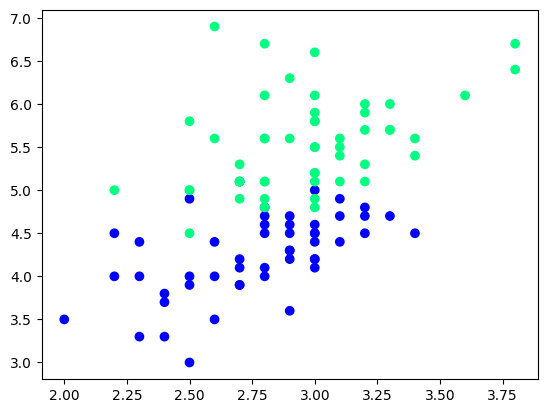

In [153]:
plt.scatter(df['Sepal_width'],df['Petal_length'],c=df['Species'],cmap='winter')

In [154]:
df_train = df.iloc[:60,:].sample(10)
df_train

,Sepal_width,Petal_length,Species
95,3.0,4.2,1
76,2.8,4.8,1
102,3.0,5.9,2
90,2.6,4.4,1
80,2.4,3.8,1
99,2.8,4.1,1
85,3.4,4.5,1
82,2.7,3.9,1
57,2.4,3.3,1
65,3.1,4.4,1


In [155]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [156]:
df_train

,Sepal_width,Petal_length,Species
108,2.5,5.8,2
50,3.2,4.7,1
91,3.0,4.6,1
65,3.1,4.4,1
90,2.6,4.4,1
139,3.1,5.4,2
131,3.8,6.4,2
82,2.7,3.9,1
111,2.7,5.3,2
127,3.0,4.9,2


In [157]:
df_val

,Sepal_width,Petal_length,Species
112,3.0,5.5,2
59,2.7,3.9,1
92,2.6,4.0,1
137,3.1,5.5,2
117,3.8,6.7,2


In [158]:
df_test

,Sepal_width,Petal_length,Species
58,2.9,4.6,1
107,2.9,6.3,2
96,2.9,4.2,1
71,2.8,4.0,1
98,2.5,3.0,1


In [159]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [160]:
X_test

array([[3. , 5.5],
       [2.7, 3.9],
       [2.6, 4. ],
       [3.1, 5.5],
       [3.8, 6.7]])

In [161]:
y_test

array([2, 1, 1, 2, 2])

# Case 1 - Bagging

In [162]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,Sepal_width,Petal_length,Species
139,3.1,5.4,2
50,3.2,4.7,1
127,3.0,4.9,2
50,3.2,4.7,1
127,3.0,4.9,2
90,2.6,4.4,1
131,3.8,6.4,2
90,2.6,4.4,1


In [163]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [164]:
dt_bag1 = DecisionTreeClassifier()

In [165]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

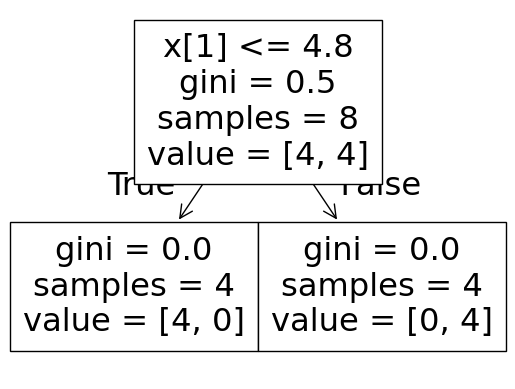

1.0


c:\Users\Kirti Shendge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Kirti Shendge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


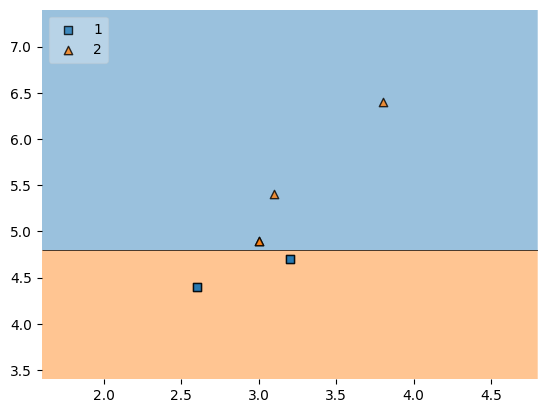

In [166]:
evaluate(dt_bag1,X,y)

In [176]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,Sepal_width,Petal_length,Species
127,3.0,4.9,2
131,3.8,6.4,2
111,2.7,5.3,2
127,3.0,4.9,2
139,3.1,5.4,2
82,2.7,3.9,1
139,3.1,5.4,2
50,3.2,4.7,1


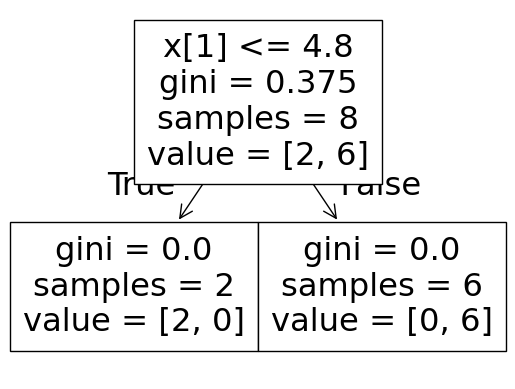

1.0


c:\Users\Kirti Shendge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Kirti Shendge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


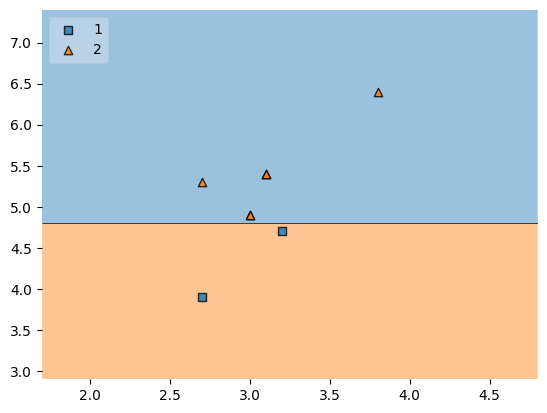

In [177]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [178]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,Sepal_width,Petal_length,Species
82,2.7,3.9,1
139,3.1,5.4,2
131,3.8,6.4,2
108,2.5,5.8,2
82,2.7,3.9,1
111,2.7,5.3,2
131,3.8,6.4,2
91,3.0,4.6,1


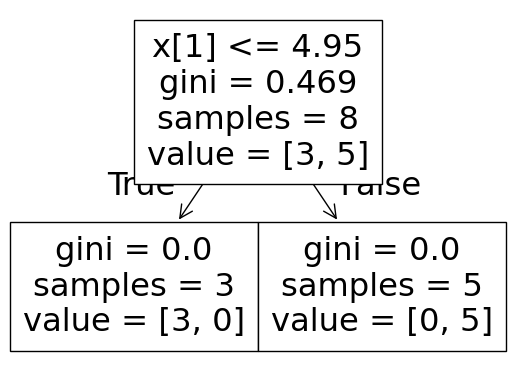

1.0


c:\Users\Kirti Shendge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Kirti Shendge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


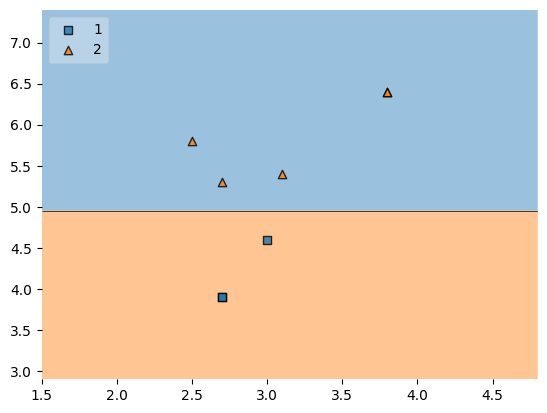

In [179]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

## Predict

In [180]:
df_test

,Sepal_width,Petal_length,Species
58,2.9,4.6,1
107,2.9,6.3,2
96,2.9,4.2,1
71,2.8,4.0,1
98,2.5,3.0,1


In [185]:
print("Predictor 1",dt_bag1.predict(np.array([2.9,4.6]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.9,6.3]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.9,4.2]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [2]
Predictor 3 [1]


c:\Users\Kirti Shendge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Kirti Shendge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Kirti Shendge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [188]:
# Row sampling without replacement
df_train

,Sepal_width,Petal_length,Species
108,2.5,5.8,2
50,3.2,4.7,1
91,3.0,4.6,1
65,3.1,4.4,1
90,2.6,4.4,1
139,3.1,5.4,2
131,3.8,6.4,2
82,2.7,3.9,1
111,2.7,5.3,2
127,3.0,4.9,2


In [189]:
df_train.sample(8)

,Sepal_width,Petal_length,Species
50,3.2,4.7,1
131,3.8,6.4,2
139,3.1,5.4,2
82,2.7,3.9,1
127,3.0,4.9,2
90,2.6,4.4,1
108,2.5,5.8,2
65,3.1,4.4,1


# Random Subspaces

In [191]:
df1 = pd.read_csv('iris.csv')
df1 = df1.sample(10)

In [192]:
df1

,Dataset_order,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
33,34,5.5,4.2,1.4,0.2,setosa
106,107,4.9,2.5,4.5,1.7,virginica
90,91,5.5,2.6,4.4,1.2,versicolor
28,29,5.2,3.4,1.4,0.2,setosa
114,115,5.8,2.8,5.1,2.4,virginica
56,57,6.3,3.3,4.7,1.6,versicolor
84,85,5.4,3.0,4.5,1.5,versicolor
138,139,6.0,3.0,4.8,1.8,virginica
81,82,5.5,2.4,3.7,1.0,versicolor
136,137,6.3,3.4,5.6,2.4,virginica


In [197]:
df1.sample(2,replace=True,axis=1)

,Sepal_width,Petal_width
33,4.2,0.2
106,2.5,1.7
90,2.6,1.2
28,3.4,0.2
114,2.8,2.4
56,3.3,1.6
84,3.0,1.5
138,3.0,1.8
81,2.4,1.0
136,3.4,2.4


# Random Patches

In [198]:
df1

,Dataset_order,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
33,34,5.5,4.2,1.4,0.2,setosa
106,107,4.9,2.5,4.5,1.7,virginica
90,91,5.5,2.6,4.4,1.2,versicolor
28,29,5.2,3.4,1.4,0.2,setosa
114,115,5.8,2.8,5.1,2.4,virginica
56,57,6.3,3.3,4.7,1.6,versicolor
84,85,5.4,3.0,4.5,1.5,versicolor
138,139,6.0,3.0,4.8,1.8,virginica
81,82,5.5,2.4,3.7,1.0,versicolor
136,137,6.3,3.4,5.6,2.4,virginica


In [202]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,Species,Petal_width
28,setosa,0.2
84,versicolor,1.5
56,versicolor,1.6
90,versicolor,1.2
136,virginica,2.4
28,setosa,0.2
33,setosa,0.2
114,virginica,2.4
